# Neural & Behavioral Modeling - Week 15 (Exercises)
by Your Name (Your Email)

In [1]:
%config IPCompleter.greedy=True 
%matplotlib inline
from matplotlib.pyplot import *
from IPython.display import *
import numpy as np
from scipy import signal

## 1 Spike Timing Varability

Here we explore whehter an I-F neuron with some stochasticity can generate Poisson-like spikes, whoses inter-spike intervals (ISIs) can be modelled by an exponential distribution featuring Cv=1 (see P.5 of model_15_slides.pdf for an example).

Three kinds of noise can be SYSTEMATICALLY added to the I-F process: (1) a stochastic firing threshold; (2) a stochastic voltage baseline; (3) a stochastic excitation during integration.

### 1.0 The Leaky Integrate-and-Fire Model (4 points)

0.0


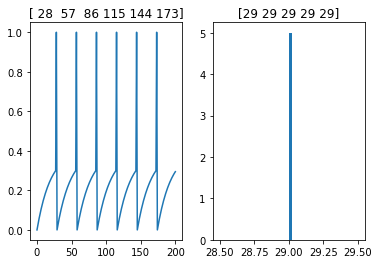

In [2]:
I=2;g=5;C=10;Vrst=0;Vthr=.3;Vspk=1;

dt=.1; V=np.array([Vrst]);
for t in np.arange(0,20,dt):
    V1=V[-1] # the last element
    s=V1>Vthr; # An implicit IF-THEN hack
    V2=s*Vrst+(1-s)*(V1+dt/C*(-g*V1+I)) # Euler integration
    V1=s*Vspk+(1-s)*V1 # Spiking now?
    V[-1]=V1; V=np.append(V,V2)

spike_timings=np.where(V==Vspk)[0]
subplot(1,2,1); plot(V);
title(spike_timings);

ISIs=np.diff(spike_timings);
cv=np.std(ISIs)/np.mean(ISIs)
print(cv)
subplot(1,2,2);hist(ISIs,bins=50); title(ISIs);

### 1.1 Your modified I-F model

In [ ]:
# Please write your codes here.

Please write your discussion here, if any.

## 2  Mechanisms of neuronal synchrony (4 points)

Here we try to examine what factors are responsible for neuronal synchrony.

Specifically please try to SYSTEMATICALLY change simulation parameters or model parameters to break the alpha rhythm (~10Hz) among 1,000 Izhikevich neurons.

Note that the simulation results will vary unless you fix a random seed.

### 2.0 An ensemble of Izhikevich neurons

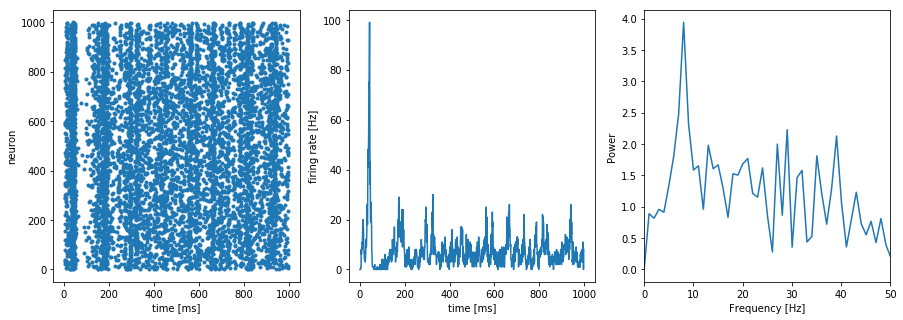

In [4]:
# Excitatory neurons                      Inhibitory neurons
Ne=800;                                   Ni=200;
re=np.random.rand(Ne);                    ri=np.random.rand(Ni); 
a=np.append(0.02*np.ones(Ne),             0.02+0.08*ri);
b=np.append(0.2*np.ones(Ne),              0.25-0.05*ri);
c=np.append(-65+15*re**2,                 -65*np.ones(Ni));
d=np.append(8-6*re**2,                    2*np.ones(Ni));
S=np.hstack([0.5*np.random.rand(Ne+Ni,Ne),-np.random.rand(Ne+Ni,Ni)]); # synaptic connection 

v=-65*np.ones(Ne+Ni)      # Initial values of v
u=b*v                     # Initial values of u
firings=np.array([])      # spike timings: [t, neuron that fire at t]

for t in range(1000):     # simulation of 1000 ms 
    I=np.append(5*np.random.randn(Ne),2*np.random.randn(Ni)) # thalamic input 
    fired=np.where(v>=30)[0] # indices of spikes
    if(fired.size>0):
        new_firings=np.hstack([np.repeat([[t]],fired.size,axis=0),np.array([fired]).T])
        firings=np.vstack([firings,new_firings]) if(firings.size>0) else new_firings
        v[fired]=c[fired]  
        u[fired]=u[fired]+d[fired]
        I=I+np.sum(S[:,fired],1)
    v=v+0.5*(0.04*v**2+5*v+140-u+I)
    v=v+0.5*(0.04*v**2+5*v+140-u+I)
    u=u+a*(b*v-u)   

figure(figsize=(15,5))
subplot(1,3,1); plot(firings[:,0],firings[:,1],'.');
xlabel('Time [ms]'); ylabel('Neuron #');

rate=np.zeros(1000) # firing rate at each t
for t in range(1000):
    rate[t]=np.sum(firings[:,0]==t)

subplot(1,3,2); plot(rate); 
xlabel('Time [ms]'); ylabel('Firing rate [Hz]');


# Frequency analysis:
import scipy.fftpack
N=1000 # samples
Fs=1/1000 # sampling frequency (Hz)
yf=scipy.fftpack.fft(rate)
yf[0]=0; # remove the DC component
xf=np.linspace(0,1/(2*Fs),int(N/2))
subplot(1,3,3); plot(xf, 2/N*np.abs(yf[:int(N/2)])); 
xlabel('Frequency [Hz]'); ylabel('Power'); xlim([0,50]);

### 2.1 Your broken system

In [ ]:
# Please write your codes here.

Please write your discussion here, if any.